# The History of Handwashing

This notebook covers an extensive example of data collection and visualization using historical evidence and python.

## 1. Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about <em>childbed fever</em>: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and <em>wash their hands</em>!</p>
<p>In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.</p>

In [13]:
# Importing modules
import pandas as pd                   #import pandas using nickname
from IPython.display import display   #import display using partial importation

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly_df = pd.read_csv('yearly_deaths_by_clinic.csv')    #creating data frame of yearly

# Print out yearly
display(yearly_df)    #shows beginning/last rows in tableu

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


## 2. The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>
<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

In [14]:
# Calculate proportion of deaths per no. births
#formulat to use is death_column/birth_column
yearly_df['proportion of deaths'] = yearly_df['deaths'] / yearly_df['births']  #insert new column named proportion of deaths
                                                                               #calculate proportion by dividing deaths/births columns
                                                                               
# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
#I think this meant to say... extract clinic 1 data into yearly_clinic1 and clinic 2 data into yearly_clinic2...?
yearly_clinic1 = yearly_df[(yearly_df['clinic'] == 'clinic 1')]       #taking all clinic 1 data from clinic column and assigning it to yearly_1 data frame
yearly_clinic2 = yearly_df[(yearly_df['clinic'] == 'clinic 2')]       #taking all clinic 2 data from clinic column and assigning it to yearly_2 data frame
                                                #Note: == will compare two items as long they are the same type

# Print out clinic_1 
#I'm also printing clinic_2 to see the whole data frame
display(yearly_clinic1)     #shows table with all clinic 1 patients
display(yearly_clinic2)     #shows table with all clinic 2 patients

,year,births,deaths,clinic,proportion of deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


,year,births,deaths,clinic,proportion of deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


## 3. Death at the clinics
<p>If we now plot the proportion of deaths at both Clinic 1 and Clinic 2  we'll see a curious pattern…</p>

Text(0.5, 1.0, 'Proportion of Deaths in Clinic 1 and Clinic 2')

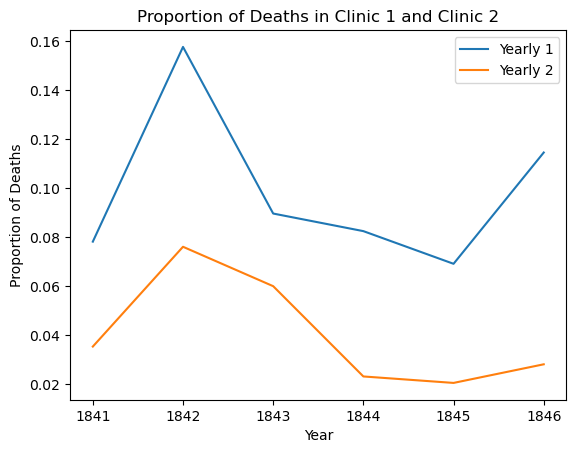

In [15]:
#this makes plots appear in the notebook
%matplotlib inline                       
import matplotlib.pyplot as plt           #import plot using nickname

ax = yearly_clinic1.plot(x='year', y='proportion of deaths', label='Yearly 1')     #creating axis variable for cinic 1 as a plot
yearly_clinic2.plot(x='year', y='proportion of deaths', label='Yearly 2', ax=ax)   #plotting clinic2 and adding clinic1 to the same plot through the axis variable
plt.xlabel("Year")                   #x axis title
plt.ylabel("Proportion of Deaths")   #y axis title
plt.legend(loc='upper right')        #moving legend
plt.title("Proportion of Deaths in Clinic 1 and Clinic 2")       #titling plot

## 4. The handwashing begins
<p>Why is the proportion of deaths consistently so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [16]:
# Read datasets/monthly_deaths.csv into monthly
monthly_df = pd.read_csv('monthly_deaths.csv')  #creating data frame of yearly

# Calculate proportion of deaths per no. births
monthly_df['proportion of deaths'] = monthly_df['deaths'] / monthly_df['births'] #insert new column named proportion of deaths
                                                                                 #calculate proportion by dividing deaths/births columns

# Print out the first rows in monthly
display(monthly_df)    #shows beginning/last rows in tableu

,date,births,deaths,proportion of deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


## 5. The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!</p>

Text(0.5, 1.0, 'Monthly Proportion of Deaths in Clinic 1')

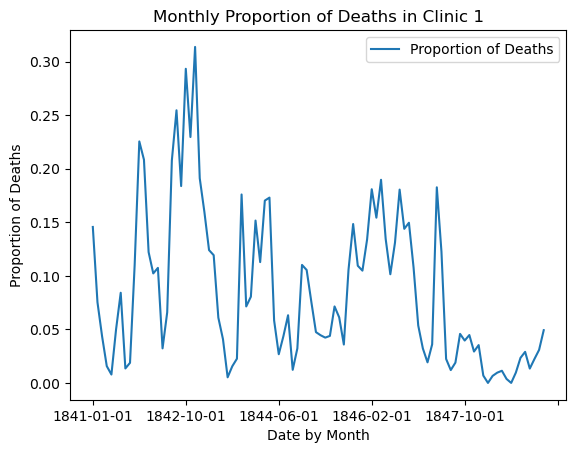

In [17]:
# Plot monthly proportion of deaths
monthly_df.plot(x='date', y='proportion of deaths', label='Proportion of Deaths') #plotting date and proportion of deaths from monthly data frame
plt.xlabel("Date by Month")          #x axis title
plt.ylabel("Proportion of Deaths")   #y axis title
plt.legend(loc='upper right')        #moving legend
plt.title("Monthly Proportion of Deaths in Clinic 1")  #titling plot

## 6. The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

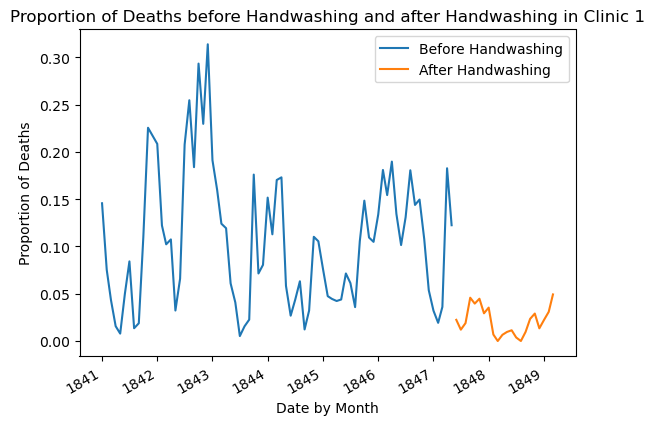

In [18]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')  # date format is year-month-day
a = str(handwashing_start)  # must convert handwashing_start into a str()

# Ensure the 'date' column is in datetime format
monthly_df['date'] = pd.to_datetime(monthly_df['date'])

# Split monthly into before and after handwashing_start
before_handwashing = monthly_df[monthly_df['date'] < handwashing_start].sort_values('date')
after_handwashing = monthly_df[monthly_df['date'] >= handwashing_start].sort_values('date')

# Plot monthly proportion of deaths before and after handwashing
ax = before_handwashing.plot(x='date', y='proportion of deaths', label='Before Handwashing')
after_handwashing.plot(x='date', y='proportion of deaths', label='After Handwashing', ax=ax)

plt.xlabel("Date by Month")
plt.ylabel("Proportion of Deaths")
plt.legend(loc='upper right')
plt.title("Proportion of Deaths before Handwashing and after Handwashing in Clinic 1")

plt.show()

## 7. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [19]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_handwashing['proportion of deaths']  #extracting proportion of deaths from before handwashing data frame
after_proportion = after_handwashing['proportion of deaths']    #extracting proportion of deaths from after handwashing data frame
mean_diff = after_proportion.mean() - before_proportion.mean()  #calculating the mean difference of before/after proportion using pandas and numpy

print("The difference in the mean monthly proportion of deaths due to handwashing is", mean_diff)

The difference in the mean monthly proportion of deaths due to handwashing is -0.0839566075118334


## 8. A Bootstrap analysis of Semmelweis handwashing data
<p>It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). </p>
<p>To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).</p>

In [20]:
# A bootstrap analysis of the reduction of deaths due to handwashing

"""
What is a bootstrap analysis:
In statistics, Bootstrap Sampling is a method that involves drawing of sample 
data repeatedly with replacement from a data source to estimate a population parameter.
"""

boot_mean_diff = []    #creating an empty list
for i in range(3000):  #i will loop through 2999 times
    boot_before = before_proportion.sample(frac=1, replace=True)  #generate a sample random row or column from the before proportion data frame
    boot_after = after_proportion.sample(frac=1, replace=True)    #generate a sample random row or column from the after proportion data frame
                                         #frac: Float value, Returns (float value * length of data frame values ); cannot be used with n
                                         #replace: Boolean value, return sample with replacement if True
    boot_mean_diff.append(boot_after.mean() - boot_before.mean()) #adding (appending) new variable to the empty list
                                                                  #bood_mean_diff is the mean of boot_before and boot_after

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])  #inputing boot_mean_diff in an array and calculating quantile at 95% confidence
                                         #series is a 1D array that holds data of any type (integer, string, float, objects, etc.)
                                         #quantile() function return values at the given quantile over requested axis, a numpy.percentile
print(confidence_interval)

0.025   -0.101314
0.975   -0.067198
dtype: float64


## 9. The fate of Dr. Semmelweis
<p>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>
<p>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as <em>bacteria</em>) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.</p>
<p>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.</p>

In [21]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = False